In [1]:
import numpy as np
import os, sys
import matplotlib.pyplot as plt

from PyGEECSPlotter.scan_data_analysis import ScanDataAnalyzer
from PyGEECSPlotter.image_analysis import ImageAnalyzer
from PyGEECSPlotter.widgets import get_selection_box


PyGEECSPlot imported successfully...


In [2]:
# Setting the diagnostic and analysis, display options for running 
# the analysis and for displaying data

diagnostic='CAM-HPD-CCD'
file_ext='.png'


analyzer_dict = {
    # 1) Saturation
    'return_n_saturated': False,  # Whether to count saturated pixels
    'bit_depth': 12,  # Bit depth of the image
    'saturation_threshold': None,  # Custom saturation threshold

    # 2) Background subtraction
    'bg_file': True,  # Whether to use a background file
    'bg_const': 0,  # Constant background subtraction value
}

display_dict = {}


In [3]:
# Can use search_replace to change column names to more useful names
# Can use column_math to quickly turn column values into more useful quantites (e.g. stage positions)

column_math_filename = '/Users/alexpicksley/Documents/GitHub/bella_analysis/user_data/2024-02-29_columnmath_testguiding.txt'
search_replace_filename = '/Users/alexpicksley/Documents/GitHub/bella_analysis/user_data/2024-02-29_searchreplace.txt'



In [4]:
# Define which scan to look at 

experiment_dir = '/Users/alexpicksley/Documents/LBNL/General_PW/GEECS_Testing'
_, _, _, _, _, sfile_disp = get_selection_box(experiment_dir, display_widgets=True)


interactive(children=(Output(),), _dom_classes=('widget-interact',))

interactive(children=(Output(),), _dom_classes=('widget-interact',))

interactive(children=(Output(),), _dom_classes=('widget-interact',))

interactive(children=(Output(),), _dom_classes=('widget-interact',))

interactive(children=(Output(),), _dom_classes=('widget-interact',))

In [5]:
# Select sfile from GUI
sfilename = sfile_disp.value

# OR Manually define s-file
# sfilename = r'Z:\data\Thomson\Y2024\06-Jun\24_0628\analysis\s4.txt'

print("sfilename = r'%s'" %sfilename)

sfilename = r'/Users/alexpicksley/Documents/LBNL/General_PW/GEECS_Testing/Y2024/01-Jan/24_0131/analysis/s23.txt'


In [6]:
# Load the Scalar Data for that scan in, and filter any data if desired

scan_data = ScanDataAnalyzer(sfilename=sfilename,
                       diagnostic=diagnostic,
                       file_ext=file_ext,
                       )

scan_data.load_scan_data(
    search_replace_filename=search_replace_filename, 
    column_math_filename=column_math_filename,
)

scan_data.filter_scan_data('HPD stage position', 200, 230, filter_exclusive=False)



54 / 126 shots included. Filtered based on : HPD stage position 


In [7]:
# Load the Scalar Data for that scan in, and filter any data if desired

analyzer = ImageAnalyzer(diagnostic=diagnostic, 
                 file_ext=file_ext, 
                 analyzer_dict=analyzer_dict, 
                 display_dict=analyzer_dict
                        )



In [8]:
# Automatically load the bg file for that diagnostic

bg_filename = scan_data.get_bg_file_path(which_scan='last')
bg = analyzer.load_data(bg_filename)


/Users/alexpicksley/Documents/LBNL/General_PW/GEECS_Testing/Y2024/01-Jan/24_0131/scans/Scan023/CAM-HPD-CCD/Scan023_CAM-HPD-CCD_035.png


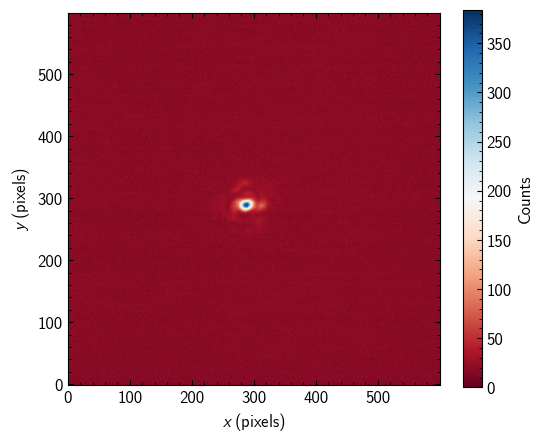

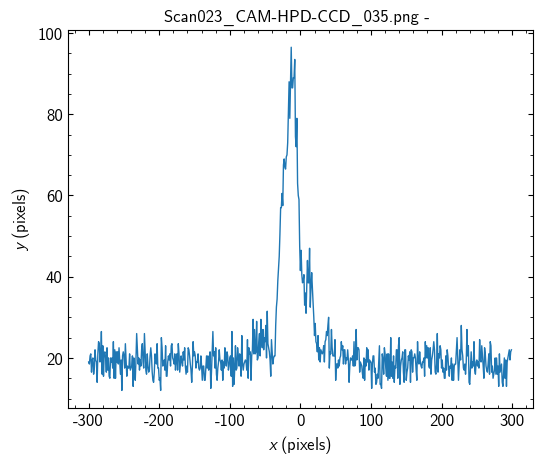

In [9]:
# Check one image

idx = np.where(scan_data.data['Shotnumber'] == 35)[0][0]
filename = scan_data.data['%s file_list' %diagnostic][idx]
print(filename)

data = analyzer.load_data(filename)
data, return_dict = analyzer.analyze_data(data, analyzer_dict={}, bg=bg)

fig, ax = analyzer.display_data(data, display_dict)

fig, ax = analyzer.display_lineout(return_dict['x'], return_dict['x_lo'], title=os.path.basename(filename))


In [10]:
# Analyze the whole scan and save the analyzed scalar values back to the Scalar Data File

add_columns_df = scan_data.analyze_scan(analyzer, 
        bg=bg, 
        display_data=False,
        write_columns_to_sfile=False, 
        overwrite_columns=True, 
        analysis_label=''
        )